# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is used cars price prediction important to solve?
 The used car market is a vibrant markets with an annual turnover of hundreds of billions of dollars. In India (where the dataset is from), the used car market is estimated at[ $34 Billion a year](https://www.adlittle.com/en/insights/viewpoints/powering-india%E2%80%99s-used-car-market).

### **The objective:**

 - What is the intended goal?
 The objective of this project is to create a predicting model that can help used cars trading companies assess the target price for a used car, both for buying and for selling purposes.

### **The key questions:**

- What are the key questions that need to be answered?
The key questions are:

What are the best predictors of a used car price?
What is Recomended car price offer for each car?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are trying to build a supervised regression model that estimates the price of a used car based on its features, such as brand, model, manufacturing year, mileage, fuel type, transmission, location, and ownership history. The goal is to minimize the difference between the predicted price and the actual market price, allowing used car dealers to make data-driven pricing decisions.
This involves:

Identifying the most influential features (predictors) for pricing.

Engineering and transforming features to improve predictive power.

Selecting and tuning regression models to maximize accuracy.

Quantifying model performance using appropriate evaluation metrics (RMSE, MAE, R²).

Translating the model's predictions into actionable insights - Price offer

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

import plotly.express as px

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for train / test split
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Just a visual unification
custom_palette = ['#d01c8b', '#4dac26']  # pink to green

# Seaborn defaults
sns.set_palette(custom_palette)
sns.set_style("whitegrid")  # Optional styling

#  Matplotlib defaults
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

# Plotly defaults
px.defaults.color_discrete_sequence = custom_palette

# Optional case I use seaborn.color_palette("PiYG") elsewhere
piyg_palette = sns.color_palette("PiYG", 7).as_hex()


from matplotlib.colors import LinearSegmentedColormap

bubblegum_pistachio_cmap = LinearSegmentedColormap.from_list(
    name='bubblegum_pistachio',
    colors=['#d01c8b', '#f2b4d4', '#d9f0d3', '#4dac26']
)

### **Let us load the data**

In [ ]:
# Loading the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/MIT/DataSets/used_cars.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First five records
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking general info regarding the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
# Missing values
df.isna().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


# **Exploratory Data Analysis**

In [ ]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


In [ ]:
# Check the ovservation in which Kilometers_Driven is  6.5M
df[df['Kilometers_Driven'] == 6500000]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0


# **Observation:**
Given a speed of 100 km/h non-stop, it would take 7.4 years of continuous driving to reach 6.5 million km - without a single stop for fuel, maintenance, or sleep. Let's say drivers switch shifts for food, sleep, and bathroom breaks - even then, this is not unlikely, it's impossible.

This dataset has been floating around the web for a few years, so I'm calling it:

Someone probably added a zero. Or two.
(If three - I want the seller's number. That's a hell of a bargain)

I'm currently debating whether to:

* Drop the observation,

* Drop a zero (or two),

* Impute a reasonable value (e.g., median mileage for the 2017 cohort).

TBD. But it's not staying like that.

In [ ]:
# Check number of unique values in dtype object
df.select_dtypes(include='object').nunique()

,0
Name,2041
Location,11
Fuel_Type,5
Transmission,2
Owner_Type,4


# **Observations:**
* The dataset includes used cars manufactured between 1996 to 2019.

* We have a mix of objects, integers and floats in the dataset.
* Most of the featutures have no nulls at all or very small amount of nulls.
* Some are missing several dozens of values, that can be easily estimated to a pretty precie level.
* New_price is missing most of the values with more than 6K Nans.

* Our target value is missing around 1.2K values. Since it is our target variable, we will have to drop these.
* Name has over 2K unique values. In order to benefit from it, we will need to perform some feature engineering

* There are now suspicious values, Except for 1 observation. Engine max value of 6K is realistic, HP of over 600 is also realistic. 1 observation:

## **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale
# adapted, with changes, from MIT APDS histogram_boxplot example
import math
import matplotlib.pyplot as plt
import seaborn as sns

def multi_histogram_boxplot(df, features=None, ncols=2, figsize_per_plot=(4, 2), kde=False, bins=None):
    """
    Draw a boxplot stacked over a histogram for each numeric feature in a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing data to visualize.
    features : list of str, optional
        List of column names to plot. If None, all numeric columns are used.
    ncols : int
        Number of subplots to display per row.
    figsize_per_plot : tuple(float, float)
        Size (width, height) for each feature's subplot pair.
    kde : bool
        Whether to overlay a KDE curve on the histogram.
    bins : int or None
        Number of bins for the histogram.
    """
    # 1. Determine which features to plot:
    if features is None:
        # Select all columns of numeric types if user didn't specify
        features = df.select_dtypes(include="number").columns.tolist()
    n = len(features)
    # Calculate how many rows of feature plots we'll need
    nrows = math.ceil(n / ncols)

    # 2. Create a grid of Matplotlib axes:
    # Each feature uses two stacked axes (boxplot above histogram)
    # So we multiply rows by 2 to get total plot rows
    fig, axes = plt.subplots(
        nrows = nrows * 2,
        ncols = ncols,
        sharex=False,
        figsize=(figsize_per_plot[0] * ncols,
                 figsize_per_plot[1] * nrows * 2),
        gridspec_kw={
            # Give 25% of vertical space to boxplots and 75% to histograms
            "height_ratios": [0.25, 0.75] * nrows
        }
    )
    # Reshape axes array to [feature_row, (box,hist), column]
    axes = axes.reshape(nrows, 2, ncols)

    # 3. Loop through each feature and draw plots:
    for idx, feature in enumerate(features):
        # Compute row and column index for this feature
        row = idx // ncols
        col = idx % ncols

        # Separate axes for boxplot (row,0) and histogram (row,1)
        ax_box = axes[row, 0, col]
        ax_hist = axes[row, 1, col]

        # --- Boxplot: show distribution summary above ---
        sns.boxplot(
            data=df,
            x=feature,
            ax=ax_box,
            showmeans=True ,        # mark the mean on the boxplot
            color="#d01c8b", # box color
            meanprops={
        #"marker": "X",
        "markerfacecolor": "#4dac26",
        "markeredgecolor": "#4dac26",
        "markersize": 7}
        )
        # Remove y-axis label and ticks for cleaner look
        ax_box.set(ylabel="")
        ax_box.tick_params(bottom=False, labelbottom=False)

        # --- Histogram: show frequency distribution below ---
        hist_kwargs = {
            'data': df,
            'x': feature,
            'kde': kde,
            'ax': ax_hist,
            'color': '#4dac26'
        }
        # Add bins if user specified
        if bins:
            hist_kwargs['bins'] = bins
        # Draw histogram
        sns.histplot(**hist_kwargs)

        # Overlay vertical lines for mean and median
        ax_hist.axvline(df[feature].mean(), color='#d01c8b', linestyle="--", label="mean")
        ax_hist.axvline(df[feature].median(), color="black", linestyle="-",  label="median")
        ax_hist.legend(loc="upper right", fontsize="small")

    # 4. Hide any unused subplots if feature count doesn't fill grid
    total_plots = nrows * ncols
    for idx in range(n, total_plots):
        row = idx // ncols
        col = idx % ncols
        # Turn off both box and histogram axes
        for subax in axes[row, :, col]:
            subax.set_visible(False)

    # 5. Final layout adjustments and display
    plt.tight_layout()
    plt.show()

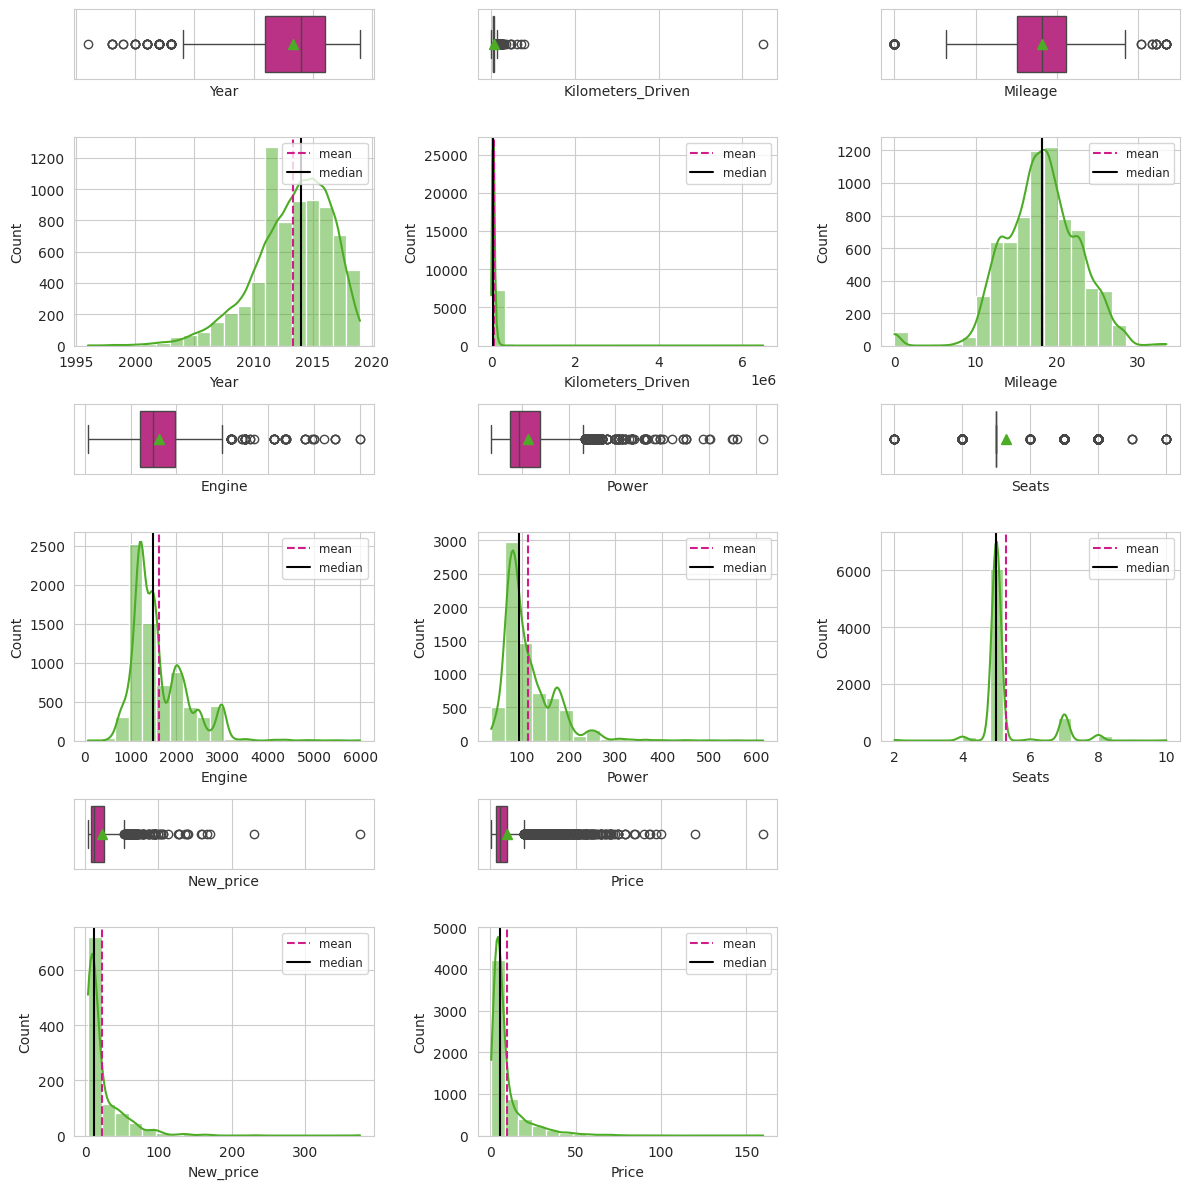

In [ ]:
# Drop Serial Number
df.drop('S.No.', axis=1, inplace=True)

# Subset only numerical columns (int and float)
numeric_df = df.select_dtypes(include=['int', 'float'])

# Call function on the filtered DataFrame
multi_histogram_boxplot(numeric_df, ncols=3, figsize_per_plot=(4,2), kde=True, bins=20)

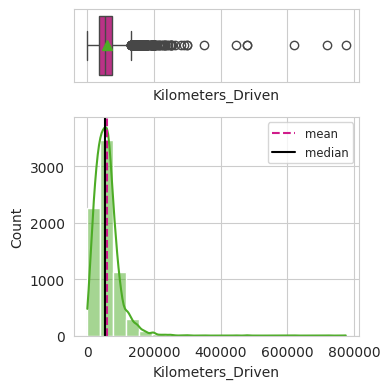

In [ ]:
# Replacing the 6.5M Kilometers_Driven observation with mean in cohort - Fixing the extreme outlier
df.loc[df['Kilometers_Driven'] == 6500000, 'Kilometers_Driven'] = df[df['Year'] == 2017]['Kilometers_Driven'].mean()

# Plotting histogram/boxplot for that column
multi_histogram_boxplot(df[['Kilometers_Driven']], ncols=1, figsize_per_plot=(4,2), kde=True, bins=20)

# **Observation:**
Much Better. Still a long tail. Maybe we will log it.

# **Log Transforming**
Price, New Price and Kilometers Driven are highly skewed to the right. Let's log them. I'll log them with 1p case there are missing values.

In [ ]:
# Log Price
df['Price_log'] = np.log1p(df['Price'])



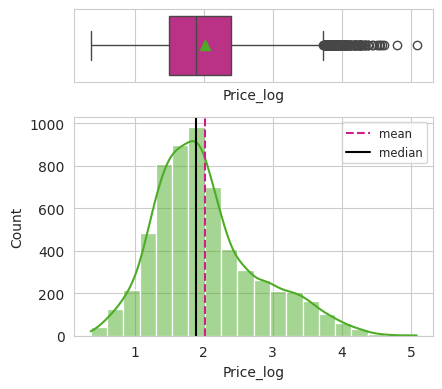

In [ ]:
multi_histogram_boxplot(df[['Price_log']], ncols=3, figsize_per_plot=(4,2), kde=True, bins=20)

## **Bivariate Analysis**

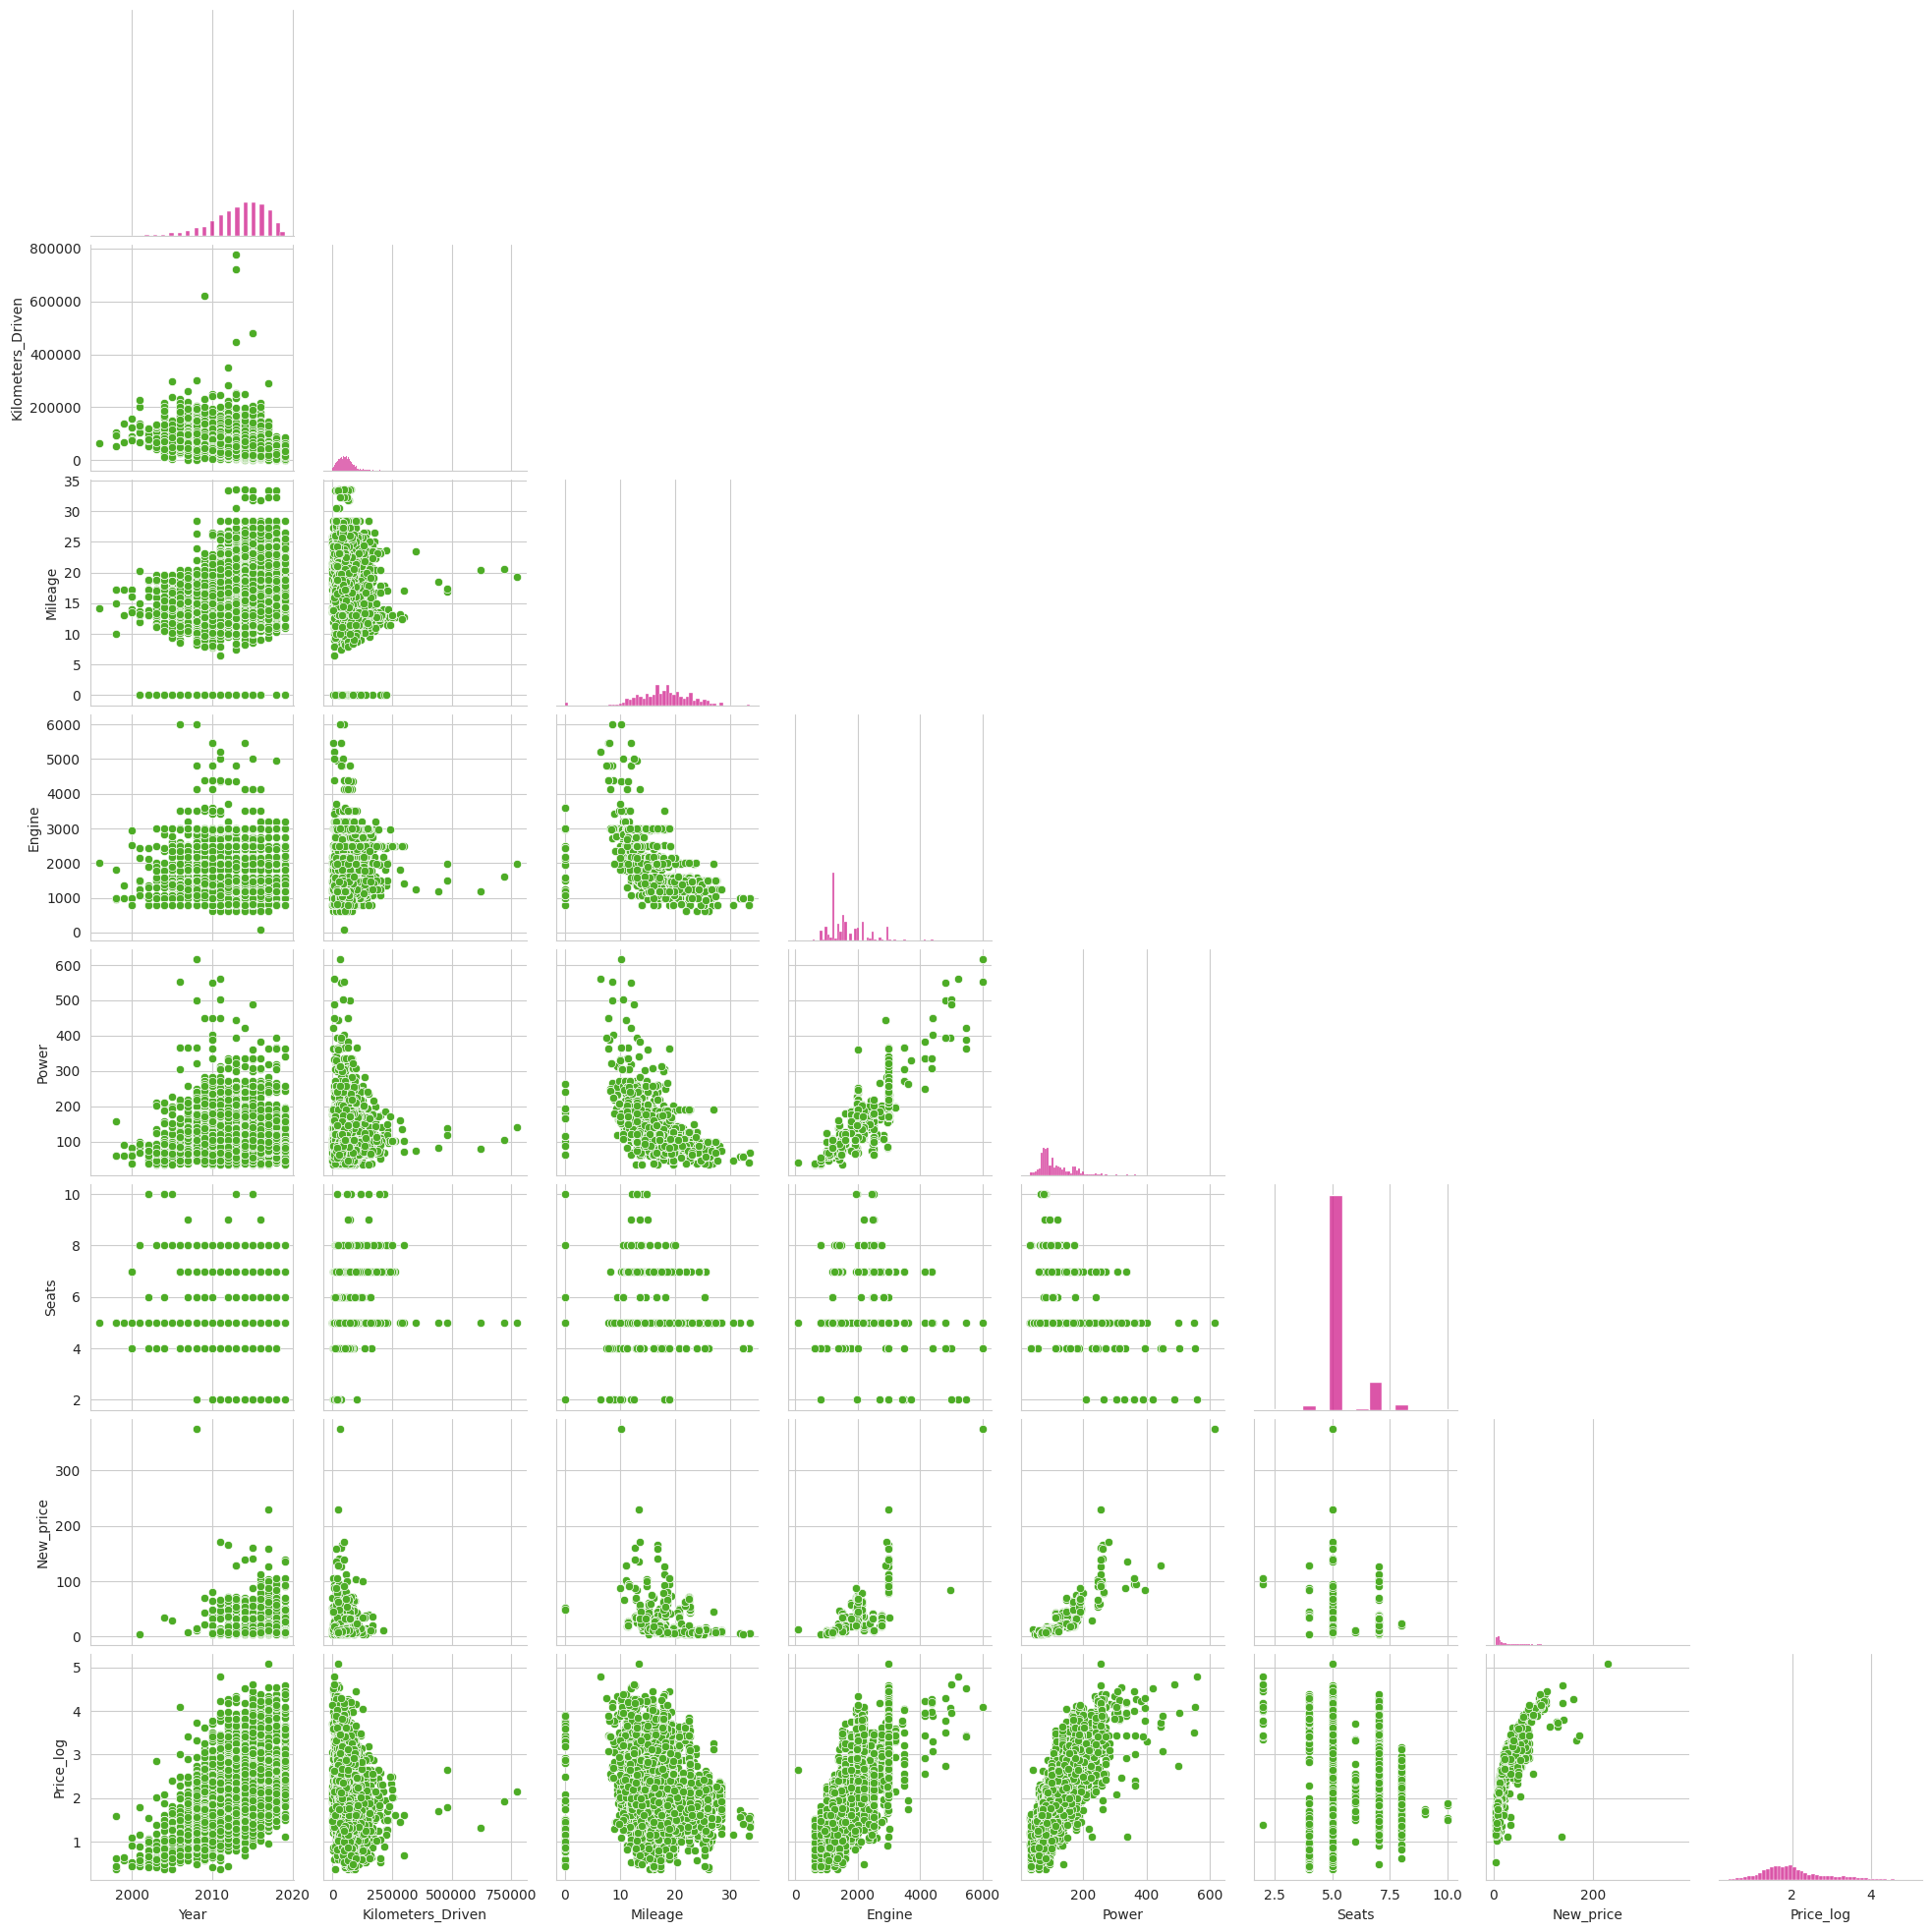

In [ ]:
df_pp = df[['Year', 'Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'New_price', 'Price_log']]
figsize=(10, 10)
sns.pairplot(df_pp, plot_kws={'color': '#4dac26'},  diag_kws={'color': '#d01c8b'}, corner=True)
plt.show()


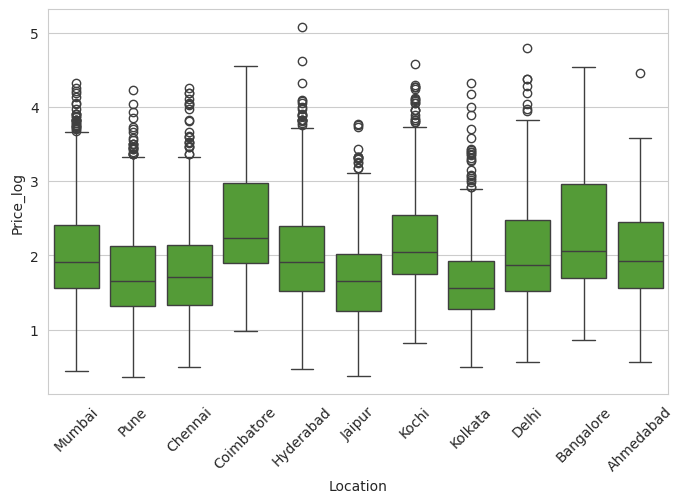

In [ ]:
# Boxplot Price_log broken by Location
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location', y='Price_log', data=df, color='#4dac26')
plt.xticks(rotation=45);

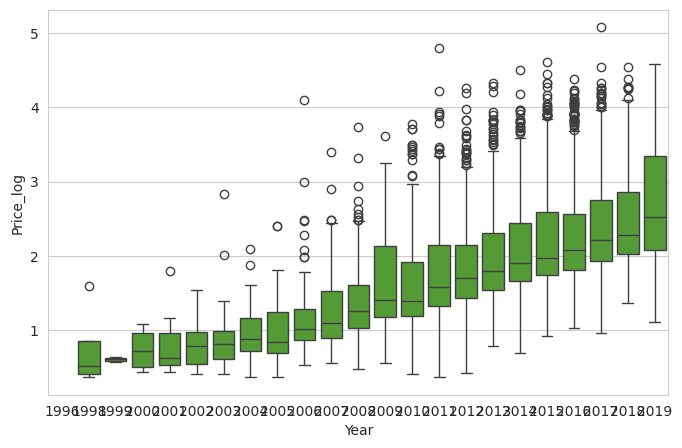

In [ ]:
# Boxplot Price_log broken by Year
plt.figure(figsize=(8, 5))
sns.boxplot(x= 'Year', y='Price_log', data=df, color='#4dac26');

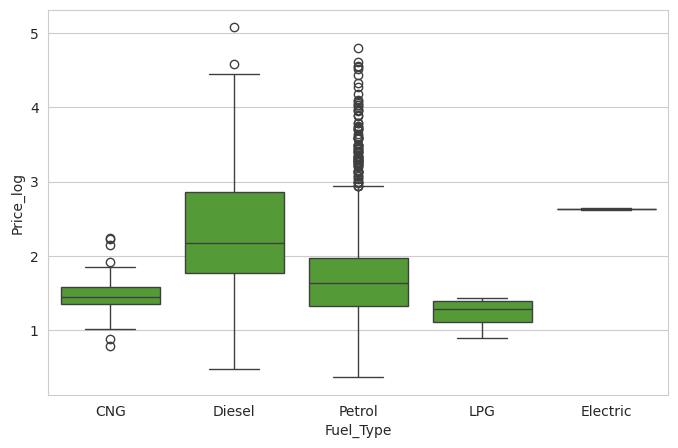

In [ ]:
# Boxplot Price_log broken by Fuel_Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Price_log', data=df, color='#4dac26');

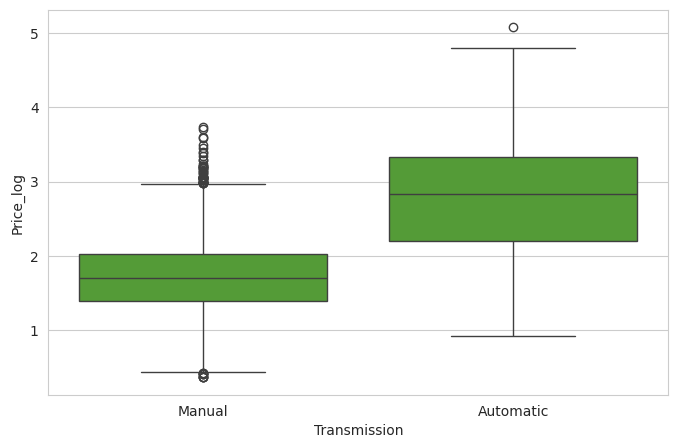

In [ ]:
# Boxplot Price_log broken by Transmission
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y='Price_log', data=df, color='#4dac26');

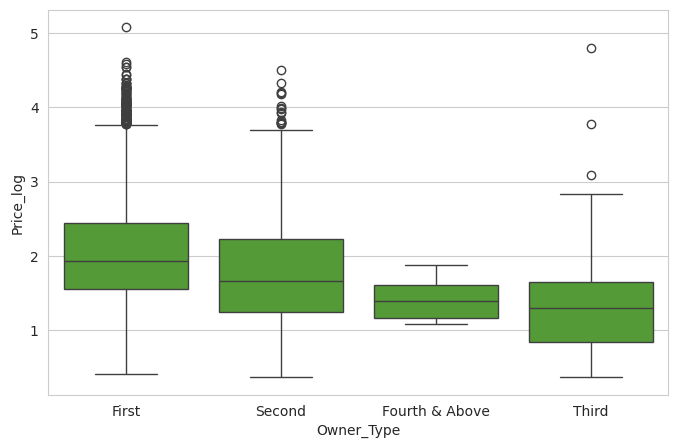

In [ ]:
# Boxplot Price_log broken by Owner_Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Owner_Type', y='Price_log', data=df, color='#4dac26');

# **Observation:**
Fourth and above have the same median as third. this contradicts common sense. from the distribution we see that perhaps there are not too many observations. This can explain this strange beaviour. Let's check

In [ ]:
# All Cars in which Owner type is Fourth & Above
df[df['Owner_Type'] == 'Fourth & Above'].shape


(12, 14)

In [ ]:
df[df['Owner_Type'] == 'Fourth & Above'].head(12)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Price_log
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000.0,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,NaN,4.00,1.609438
885,Maruti Grand Vitara AT,Chennai,2008,77000.0,Petrol,Automatic,Fourth & Above,9.7,1995.0,163.50,5.0,NaN,5.50,1.871802
1081,Hyundai i20 1.2 Sportz Option,Bangalore,2010,61000.0,Petrol,Manual,Fourth & Above,17.0,1197.0,80.00,5.0,NaN,3.25,1.446919
1699,Ford Endeavour 4x2 XLT Limited Edition,Pune,2007,90000.0,Diesel,Manual,Fourth & Above,10.9,2499.0,143.00,7.0,NaN,3.00,1.386294
2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2005,240000.0,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,8.0,NaN,5.10,1.808289
3368,Maruti Swift Ldi BSIII,Pune,2009,80000.0,Diesel,Manual,Fourth & Above,17.8,1248.0,75.00,5.0,NaN,2.15,1.147402
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000.0,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,NaN,2.35,1.208960
4148,Ford Ikon 1.3 Flair,Coimbatore,2008,59833.0,Petrol,Manual,Fourth & Above,13.8,1299.0,70.00,5.0,NaN,1.97,1.088562
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000.0,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20,1.163151
6226,Maruti Omni E 8 Str STD,Bangalore,2005,81245.0,Petrol,Manual,Fourth & Above,16.8,796.0,34.20,8.0,NaN,NaN,NaN


# **Observation:**

I guess that because of the law of small numbers, we see a different distribution of cars across factors that are related to higher price: Model, # Seats, etc. Only 9 cars with price in this category.

# **Feature engineering before loging price and KM Driven**
Diesel motors can hadle more KM before they are dead. For petrol private cars. low KM is a desirable treat. Looking at the plot below we can see much more pink dots in the rectangele that starts at (5.0, 50,000) and goes all the way up and to the right.
I'll try to capture this difference using a binary variable that disticts between low KM non luxury private petrol cars and the rest.  
I want to do visualize it ad create it before I'm loging the variables.  

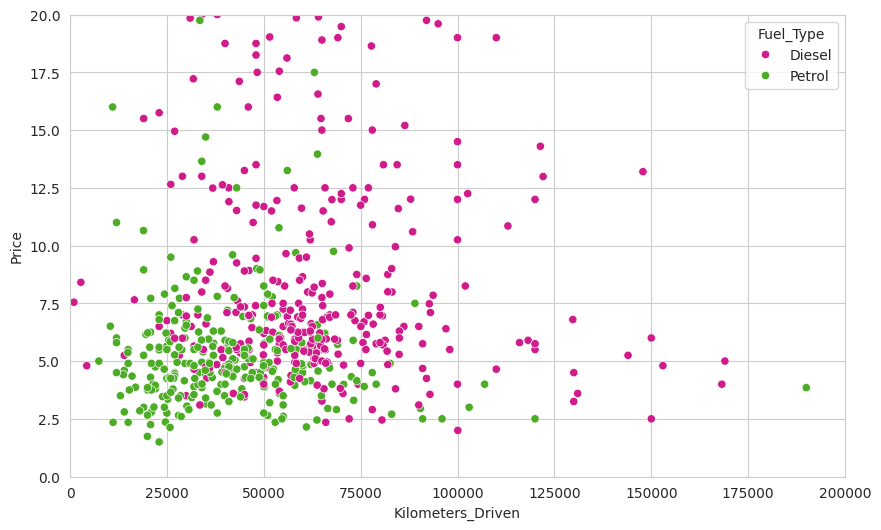

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[
        (df['Fuel_Type'].isin(['Petrol', 'Diesel'])) &
        (df['Year'] == 2015) # I stabilize Year to keep Year from confounding. This is just to show dynamics. I take 2015 as example
    ],
    x='Kilometers_Driven',
    y='Price',
    hue='Fuel_Type',
    palette=custom_palette
)
plt.ylim(0, 20)
plt.xlim(0, 200000)
plt.show()

In [ ]:
# Create a KM_Driven_Per_Year
df['KM_Driven_Per_Year'] = df['Kilometers_Driven'] / (2021 - df['Year'])

In [ ]:
 # Create a KM_Driven_Per_Year * Is Petrol
 df['KM_Driven_Per_Year_Is_Petrol'] = df['KM_Driven_Per_Year'] * df['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)


In [ ]:
# Drop Price
df = df.drop('Price', axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.011601,6545.454545,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,2.602690,6833.333333,0.0
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.704748,4600.000000,4600.0
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,1.945910,9666.666667,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,2.930660,5083.750000,0.0


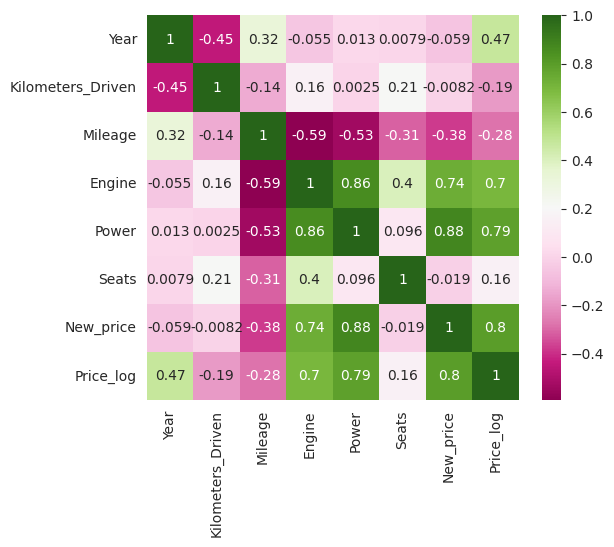

In [ ]:
# Heatmap
plt.figure(figsize = (6, 5))
sns.heatmap(df_pp.corr(), annot = True, cmap = 'PiYG')
plt.show()

# **Observations:**
* We see some strong correlations between Price (target) and New_Price, Power, Engine, and between  New_Price, Power and Engine between them (0.7 and more) suggesting that high HP big engine cars are more expensive.
* We see a medium negative correlation between price and Mileage, suggesting that luxury expensive cars are wasteful.
* We see medium+ positive correlation between Year and Price, suggesting older cars are cheaper.
All and all the results are not surprising. The best predictors are variables that do not change.
* in the categorical variables we see that diesel and electric cars are more expensive, but the frequency of electric cars is low.
* In general, more hands reduce the price, but observations with price for 4th and above are too scarce.
* There are differences between locations, I wonder if it is a result of real price varaibility (cars with same features have different frices across locations) or feature preferences change across locations (Just for an hypothetic example, maybe in Bangalore we have less low-cost models, newer vintage... etc.)
* Nice to see that Mileage is correlated with Year. Manufacturers keep improving engine efficiency.


### **Feature Engineering**

In [ ]:
 # Create a varible that extracts from Name all letters before space
 df['Make'] = df['Name'].str.split(' ').str[0]
 # All unique vaues of Make
 df['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
# Change values in Make: OpelCorsa = Opel, Force = Force One, Hindustan - Hindustan Motors
df['Make'] = df['Make'].replace(['OpelCorsa', 'Force', 'Hindustan', 'ISUZU'], ['Opel', 'Force One', 'Hindustan Motors', 'Isuzu'])

In [ ]:
 df['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force One', 'Bentley',
       'Lamborghini', 'Hindustan Motors', 'Opel'], dtype=object)

### **Missing value treatment**

Milage, Engine, Power, Seats are factory defined. We can extrct them from cars of the same model (Name)

In [ ]:
# Observations in which Mileage is Nan, replace Nan with mode in observation with the same Name
df['Mileage'] = df.groupby('Name')['Mileage'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Engine
df['Engine'] = df.groupby('Name')['Engine'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Power
df['Power'] = df.groupby('Name')['Power'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Seats
df['Seats'] = df.groupby('Name')['Seats'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for New Price
df['New_price'] = df.groupby('Name')['New_price'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)



In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,40
Power,136


Now I'll create 3 hierarchical features that will breake the Name according to the number of spaces - 2, 3, 4. For instance:

If we have Toyota Corolla Altis 1.8 G CNG:

* Model_2 = Toyota Corolla
* Model 3 = Totyota Corolla Altis
* Model 4 = Toyota Corolla Altis 1.8

Then I will repean what I did with Name, but with its lower hierarchies, gradually.

In [ ]:
df['Model_2'] = df['Name'].apply(lambda x: ' '.join(x.split()[:2]))
df['Model_3'] = df['Name'].apply(lambda x: ' '.join(x.split()[:3]))
df['Model_4'] = df['Name'].apply(lambda x: ' '.join(x.split()[:4]))

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,Model_2,Model_3,Model_4
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.011601,6545.454545,0.0,Maruti,Maruti Wagon,Maruti Wagon R,Maruti Wagon R LXI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,2.602690,6833.333333,0.0,Hyundai,Hyundai Creta,Hyundai Creta 1.6,Hyundai Creta 1.6 CRDi
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.704748,4600.000000,4600.0,Honda,Honda Jazz,Honda Jazz V,Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,1.945910,9666.666667,0.0,Maruti,Maruti Ertiga,Maruti Ertiga VDI,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,2.930660,5083.750000,0.0,Audi,Audi A4,Audi A4 New,Audi A4 New 2.0


In [ ]:
df['Mileage'] = df.groupby('Model_4')['Mileage'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Engine
df['Engine'] = df.groupby('Model_4')['Engine'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Power
df['Power'] = df.groupby('Model_4')['Power'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Seats
df['Seats'] = df.groupby('Model_4')['Seats'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for New Price
df['New_price'] = df.groupby('Model_4')['New_price'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,26
Power,112


In [ ]:
df['Mileage'] = df.groupby('Model_3')['Mileage'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Engine
df['Engine'] = df.groupby('Model_3')['Engine'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Power
df['Power'] = df.groupby('Model_3')['Power'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Seats
df['Seats'] = df.groupby('Model_3')['Seats'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for New Price
df['New_price'] = df.groupby('Model_3')['New_price'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,18
Power,63


In [ ]:
df['Mileage'] = df.groupby('Model_2')['Mileage'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Engine
df['Engine'] = df.groupby('Model_2')['Engine'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Power
df['Power'] = df.groupby('Model_2')['Power'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for Seats
df['Seats'] = df.groupby('Model_2')['Seats'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Same for New Price
df['New_price'] = df.groupby('Model_2')['New_price'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,0
Power,12


Engine and Power are highly correlated. For those still without Power, I'll give the median Power for all the observations with the same Engine +-70

In [ ]:

# First pass: exact match on Engine
df['Power'] = df.groupby('Engine')['Power'].transform(lambda x: x.fillna(x.median()))

# Second pass: fill by Engine ± 70
def fill_by_engine_range(row):
    if pd.isna(row['Power']) and not pd.isna(row['Engine']):
        matches = df[(df['Engine'] >= row['Engine'] - 70) &
                     (df['Engine'] <= row['Engine'] + 70) &
                     df['Power'].notna()]
        if not matches.empty:
            return matches['Power'].median()
    return row['Power']

df['Power'] = df.apply(fill_by_engine_range, axis=1)

In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,0
Power,0


The 2 cars without Mileage are our electric cars. kmpl values are unaplicable for them. I'll drop the 2 observations, since it will not change to much the model. One car has a Engine size of 72. That's probably another mistake in the data.

In [ ]:
df.dropna(subset=['Mileage'], inplace=True)

In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


New Price and Power are highly correlated. For those still without New Price, I'll give the median New Price for all the observations with the same Power +-60

In [ ]:
#  Controls
PWR_TOL = 60  # +/- range for "nearby" power matches. The higher the TOL, the more weight is on the make.

# Exact Make+Power median
df['New_price'] = df.groupby(['Make','Power'])['New_price'] \
                    .transform(lambda s: s.fillna(s.median()))

# Make + Power range (+/- PWR_TOL)
def fill_by_make_power_range(row):
    if pd.isna(row['New_price']) and pd.notna(row['Power']) and pd.notna(row['Make']):
        m = (
            (df['Make'] == row['Make']) &
            df['Power'].between(row['Power'] - PWR_TOL, row['Power'] + PWR_TOL) &
            df['New_price'].notna()
        )
        matches = df.loc[m, 'New_price']
        if not matches.empty:
            return matches.median()
    return row['New_price']

df['New_price'] = df.apply(fill_by_make_power_range, axis=1)

# Power-only exact median (fallback)
df['New_price'] = df.groupby('Power')['New_price'] \
                    .transform(lambda s: s.fillna(s.median()))

# Power-only range (+/- PWR_TOL) fallback
def fill_by_power_range(row):
    if pd.isna(row['New_price']) and pd.notna(row['Power']):
        m = df['Power'].between(row['Power'] - PWR_TOL, row['Power'] + PWR_TOL) & df['New_price'].notna()
        matches = df.loc[m, 'New_price']
        if not matches.empty:
            return matches.median()
    return row['New_price']

df['New_price'] = df.apply(fill_by_power_range, axis=1)

# Final global fallback  -----
df['New_price'] = df['New_price'].fillna(df['New_price'].median())

In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [ ]:
# show all rows with missing seats and Mileage
df[df['Seats'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,Model_2,Model_3,Model_4
2369,Maruti Estilo LXI,Chennai,2008,56000.0,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,5.04,0.916291,4307.692308,4307.692308,Maruti,Maruti Estilo,Maruti Estilo LXI,Maruti Estilo LXI
3882,Maruti Estilo LXI,Kolkata,2010,40000.0,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,5.04,1.252763,3636.363636,3636.363636,Maruti,Maruti Estilo,Maruti Estilo LXI,Maruti Estilo LXI
5893,Maruti Estilo LXI,Chennai,2008,51000.0,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,5.04,1.011601,3923.076923,3923.076923,Maruti,Maruti Estilo,Maruti Estilo LXI,Maruti Estilo LXI


Maruti Estilo LXI has 5 seats

In [ ]:
# Add value 5 for all Maruti Estilo LXI
df.loc[df['Name'] == 'Maruti Estilo LXI', 'Seats'] = 5

Now we need to drop all observations with missin Price_log. It is our target, and we cannot touch it.

In [ ]:
# Drop price log where is Nan
df.dropna(subset=['Price_log'], inplace=True)

In [ ]:
# Missing values
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,Model_2,Model_3,Model_4
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,5.04,1.011601,6545.454545,0.0,Maruti,Maruti Wagon,Maruti Wagon R,Maruti Wagon R LXI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,19.18,2.602690,6833.333333,0.0,Hyundai,Hyundai Creta,Hyundai Creta 1.6,Hyundai Creta 1.6 CRDi
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.704748,4600.000000,4600.0,Honda,Honda Jazz,Honda Jazz V,Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,1.945910,9666.666667,0.0,Maruti,Maruti Ertiga,Maruti Ertiga VDI,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,2.930660,5083.750000,0.0,Audi,Audi A4,Audi A4 New,Audi A4 New 2.0


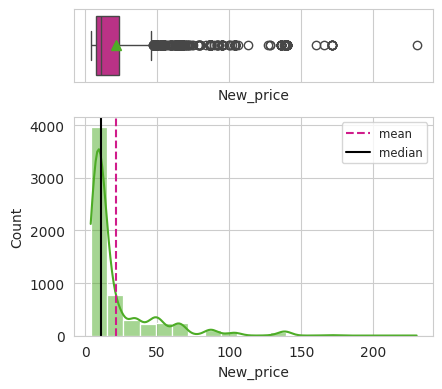

In [ ]:
multi_histogram_boxplot(df[['New_price']], ncols=3, figsize_per_plot=(4,2), kde=True, bins=20)

New Price and Kilometers driven are highly skewd to the right. Let's log them

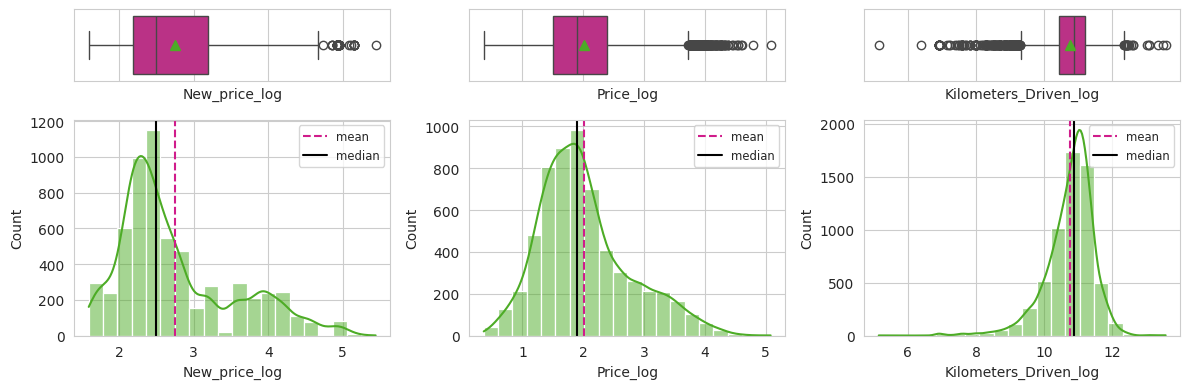

In [ ]:
# let's log New Price
df['New_price_log'] = np.log1p(df['New_price'])

# let's log Kilometers Driven
df['Kilometers_Driven_log'] = np.log1p(df['Kilometers_Driven'])


multi_histogram_boxplot(df[['New_price_log', 'Price_log', 'Kilometers_Driven_log' ]], ncols=3, figsize_per_plot=(4,2), kde=True, bins=20)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_price,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,Model_2,Model_3,Model_4,New_price_log,Kilometers_Driven_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,...,5.04,1.011601,6545.454545,0.0,Maruti,Maruti Wagon,Maruti Wagon R,Maruti Wagon R LXI,1.798404,11.184435
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,...,19.18,2.602690,6833.333333,0.0,Hyundai,Hyundai Creta,Hyundai Creta 1.6,Hyundai Creta 1.6 CRDi,3.004692,10.621352
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,...,8.61,1.704748,4600.000000,4600.0,Honda,Honda Jazz,Honda Jazz V,Honda Jazz V,2.262804,10.736418
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,...,11.27,1.945910,9666.666667,0.0,Maruti,Maruti Ertiga,Maruti Ertiga VDI,Maruti Ertiga VDI,2.507157,11.373675
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,...,53.14,2.930660,5083.750000,0.0,Audi,Audi A4,Audi A4 New,Audi A4 New 2.0,3.991573,10.613271


In [ ]:
# Let's create a new variable to replace Year with Age - sbtract Year from current Year
from datetime import datetime
df['Age'] = datetime.now().year - df['Year']

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,Model_2,Model_3,Model_4,New_price_log,Kilometers_Driven_log,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,...,1.011601,6545.454545,0.0,Maruti,Maruti Wagon,Maruti Wagon R,Maruti Wagon R LXI,1.798404,11.184435,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,...,2.602690,6833.333333,0.0,Hyundai,Hyundai Creta,Hyundai Creta 1.6,Hyundai Creta 1.6 CRDi,3.004692,10.621352,10
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,...,1.704748,4600.000000,4600.0,Honda,Honda Jazz,Honda Jazz V,Honda Jazz V,2.262804,10.736418,14
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,...,1.945910,9666.666667,0.0,Maruti,Maruti Ertiga,Maruti Ertiga VDI,Maruti Ertiga VDI,2.507157,11.373675,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,...,2.930660,5083.750000,0.0,Audi,Audi A4,Audi A4 New,Audi A4 New 2.0,3.991573,10.613271,12


In [ ]:
import re

# ---------- 0) Keep your dict, but you can shrink it now ----------
car_class_mapping = {
    # (keep your existing keys)
    'hyundai i20': 'Sub/Minicompact',
    'maruti wagon r': 'Sub/Minicompact',
    'chevrolet beat': 'Sub/Minicompact',
    'honda jazz': 'Sub/Minicompact',
    'honda city': 'Compact',
    'skoda octavia': 'Compact',
    'skoda rapid': 'Compact',
    'audi a4': 'Compact',
    'toyota corolla': 'Compact',
    'maruti ciaz': 'Compact',
    'hyundai verna': 'Compact',
    'mercedes-benz c-class': 'Mid-Size',
    'bmw 5 series': 'Mid-Size',
    'audi a6': 'Mid-Size',
    'skoda superb': 'Mid-Size',
    'toyota camry': 'Mid-Size',
    'mercedes-benz s-class': 'Large',
    'bmw 7 series': 'Large',
    'audi a8': 'Large',
    'porsche cayenne': 'Large',
    'mini cooper': 'Sub/Minicompact',
    'bmw z4': 'Sport / Two Seater',
    'audi tt': 'Sport / Two Seater',
    'toyota innova': 'Minivan',
    'maruti ertiga': 'Minivan',
    'nissan terrano': 'Small SUV',
    'hyundai creta': 'Small SUV',
    'renault duster': 'Small SUV',
    'ford ecosport': 'Small SUV',
    'maruti vitara brezza': 'Small SUV',
    'mahindra tuv300': 'Small SUV',
    'jeep compass': 'Small SUV',
    'hyundai santa fe': 'Standard SUV',
    'mahindra xuv500': 'Standard SUV',
    'toyota fortuner': 'Standard SUV',
    'bmw x1': 'Small SUV',
    'audi q3': 'Small SUV',
    'ford endeavour': 'Standard SUV',
    'land rover': 'Standard SUV',
    'mahindra scorpio': 'Standard SUV'
}

# ---------- 1) Normalization + noise removal ----------
NOISE = {
    'abs','bsii','bsiii','bsiv','vxi','vxi+','zxi','zdi','vdi','ldi','lxi','vx','vx+','vx(o)','zx','zx(o)',
    'at','mt','amt','cvt','dct','tiptronic','quattro','xdrive','4matic','4x4','4x2','awd','2wd','fwd','rwd',
    'tdci','crdi','cdi','ddi','ddis','gdi','vtec','i-vtec','vtvt','mpi','mhawk','mfalcon','revotron','revotorq',
    'edition','executive','elegance','elegant','prestige','premium','technology','tech','sport','sportline',
    'coupe','sedan','hatchback','diesel','petrol','cng','lpg','hybrid','blue','efficiency','command','royale',
    'gran','classic','facelift','new','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'
}
NUMERIC_TOKEN = re.compile(r'^\d+(\.\d+)?$')

def norm_name(name: str) -> str:
    s = re.sub(r'[^a-z0-9\s\-]', ' ', name.lower())
    s = re.sub(r'\s+', ' ', s).strip()
    toks = [t for t in s.split() if t not in NOISE and not NUMERIC_TOKEN.match(t)]
    return ' '.join(toks)

# ---------- 2) Longest-key-first dictionary matcher ----------
DICT_KEYS = sorted(car_class_mapping.keys(), key=len, reverse=True)
DICT_RE = re.compile(r'\b(?:' + '|'.join(map(re.escape, DICT_KEYS)) + r')\b')

# ---------- 3) Regex family/pattern rules (most specific first) ----------
PATTERNS = [
    # SUVs – Standard
    (re.compile(r'\b(pajero sport|rexton|gls|gle|gl-class|ml\b|x5\b|x6\b|q7\b|xc90\b|captiva|fortuner|glc 43|mux|one lx|safari|hexa|xenon)\b'), 'Standard SUV'),
    (re.compile(r'\b(glc\b|q5\b|xc60\b|x3\b|koleos|x-trail|cr-v\b|tucson)\b'), 'Standard SUV'),
    # SUVs – Small
    (re.compile(r'\b(gla\b|q3\b|x1\b|captur\b|yeti\b|wr-?v\b|br-?v\b|s-?cross\b|ecosport\b|nuvosport\b|quanto\b|tuv ?300\b|xuv300\b|countryman|freestyle|tiguan)\b'), 'Small SUV'),

    # Minivans / MPVs
    (re.compile(r'\b(innova|ertiga|lodgy|omni|eeco|tavera|versa|qualis|mobilio|evalia|venture|r-?class|xylo|enjoy)\b'), 'Minivan'),

    # Sports / Two-seaters
    (re.compile(r'\b(mx-?5|miata|z4\b|tt\b|slk|slc|boxster|cayman|911\b|mustang|gallardo|f[\s-]?type)\b'), 'Sport / Two Seater'),

    # Mercedes classes
    (re.compile(r'\b(a[-\s]?class|a\d{3}\b)\b'), 'Sub/Minicompact'),
    (re.compile(r'\b(b[-\s]?class|b\d{3}\b)\b'), 'Minivan'),
    (re.compile(r'\b(cla\b|cla[-\s]200|cla[-\s]\d{3})\b'), 'Compact'),
    (re.compile(r'\b(c[-\s]?class|c[-\s]2\d{2}|c2\d{2}\b)\b'), 'Mid-Size'),
    (re.compile(r'\b(cls[-\s]?class|cls\b)\b'), 'Large'),
    (re.compile(r'\b(e[-\s]?class|e[-\s]2\d{2}|e2\d{2}\b)\b'), 'Large'),
    (re.compile(r'\b(s[-\s]?class|s[-\s]3\d{2}|s3\d{2}\b)\b'), 'Large'),

    # BMW series
    (re.compile(r'\b1 series\b'), 'Sub/Minicompact'),
    (re.compile(r'\b3 series\b|\b3\d{2}[di]?\b'), 'Compact'),
    (re.compile(r'\b5 series\b|\b5\d{2}[di]?\b'), 'Mid-Size'),
    (re.compile(r'\b6 series\b|\b6\d{2}[di]?\b'), 'Large'),
    (re.compile(r'\b7 series\b|\b7\d{2}[di]?\b'), 'Large'),

    # Audi cars
    (re.compile(r'\ba3\b'), 'Compact'),
    (re.compile(r'\ba4\b'), 'Compact'),
    (re.compile(r'\ba6\b'), 'Mid-Size'),
    (re.compile(r'\ba7\b'), 'Large'),
    (re.compile(r'\ba8\b'), 'Large'),
    (re.compile(r'\brs5\b'), 'Sport / Two Seater'),

    # Volvo
    (re.compile(r'\bv40\b'), 'Compact'),
    (re.compile(r'\bs60\b'), 'Mid-Size'),
    (re.compile(r'\bs80\b'), 'Large'),

    # Jaguar
    (re.compile(r'\bxe\b'), 'Compact'),
    (re.compile(r'\bxf\b'), 'Mid-Size'),
    (re.compile(r'\bxj\b'), 'Large'),

    # VW
    (re.compile(r'\bjetta\b'), 'Compact'),
    (re.compile(r'\bpassat\b'), 'Mid-Size'),
    (re.compile(r'\bvento\b'), 'Compact'),
    (re.compile(r'\bameo\b'), 'Sub/Minicompact'),
    (re.compile(r'\bbeetle\b'), 'Sub/Minicompact'),

    # Honda / Toyota / Hyundai common sedans/hatches
    (re.compile(r'\bcity\b'), 'Compact'),
    (re.compile(r'\bcivic\b'), 'Compact'),
    (re.compile(r'\baccord\b'), 'Mid-Size'),
    (re.compile(r'\belantra\b'), 'Mid-Size'),
    (re.compile(r'\bxcent\b|santro|getz\b|brio\b|celerio\b|ritz\b|zen\b|a-?star\b|800\b'), 'Sub/Minicompact'),
    (re.compile(r'\betios liva\b'), 'Sub/Minicompact'),
    (re.compile(r'\betios\b'), 'Compact'),

    # Skoda
    (re.compile(r'\bfabia\b'), 'Sub/Minicompact'),
    (re.compile(r'\blaura\b|octavia\b|rapid\b'), 'Compact'),
    (re.compile(r'\bsuperb\b'), 'Mid-Size'),
    (re.compile(r'\byeti\b'), 'Small SUV'),

    # Tata
    (re.compile(r'\bnano\b|tiago\b|tigor\b'), 'Sub/Minicompact'),
    (re.compile(r'\bzest\b|bolt\b|indica\b|indigo\b|manza\b'), 'Compact'),
    (re.compile(r'\bsafari\b|hexa\b|xenon\b'), 'Standard SUV'),
    (re.compile(r'\bsumo\b|venture\b'), 'Minivan'),

    # Nissan / Datsun
    (re.compile(r'\bsunny\b'), 'Compact'),
    (re.compile(r'\bteana\b'), 'Large'),
    (re.compile(r'\bevalia\b'), 'Minivan'),
    (re.compile(r'\bx-?trail\b'), 'Small SUV'),
    (re.compile(r'\bdatsun go(\s?plus)?\b|redi-?go\b'), 'Sub/Minicompact'),

    # Renault
    (re.compile(r'\bpulse\b|kwid\b'), 'Sub/Minicompact'),
    (re.compile(r'\bscala\b'), 'Compact'),
    (re.compile(r'\bfluence\b'), 'Mid-Size'),
    (re.compile(r'\blodgy\b|lodgy\b'), 'Minivan'),
    (re.compile(r'\bcaptur\b'), 'Small SUV'),
    (re.compile(r'\bkoleos\b'), 'Standard SUV'),

    # Chevrolet
    (re.compile(r'\bbeat\b|spark\b|sail\b'), 'Sub/Minicompact'),
    (re.compile(r'\baveo\b|optra\b|cruze\b'), 'Compact'),
    (re.compile(r'\btavera\b|enjoy\b'), 'Minivan'),
    (re.compile(r'\bcaptiva\b'), 'Standard SUV'),

    # Porsche / Mini / Others
    (re.compile(r'\bpanamera\b'), 'Large'),
    (re.compile(r'\bcountryman\b'), 'Small SUV'),
    (re.compile(r'\bclubman\b'), 'Compact'),

    # Isuzu / Force
    (re.compile(r'\bd-?max\b|isuzu mux\b|\bmux\b|force one\b'), 'Standard SUV'),

    # Bentley / Ambassador
    (re.compile(r'\bflying spur\b|continental\b'), 'Large'),
    (re.compile(r'\bambassador\b'), 'Large'),
]

def classify_car(name: str, seats: float | int | None = None) -> str:
    s = norm_name(name)

    # 1) direct dictionary (longest-first)
    m = DICT_RE.search(s)
    if m:
        return car_class_mapping[m.group(0)]

    # 2) regex patterns
    for pat, label in PATTERNS:
        if pat.search(s):
            # Optional refinement using seats
            if label in ('Minivan','Standard SUV') and seats is not None:
                try:
                    if float(seats) >= 6 and 'minivan' not in label.lower():
                        # heuristics: 6+ seats + MPV keywords => Minivan
                        if re.search(r'\b(innova|ertiga|lodgy|omni|eeco|tavera|versa|qualis|mobilio|evalia|venture|xylo|enjoy|r-?class)\b', s):
                            return 'Minivan'
                except Exception:
                    pass
            return label

    # 3) broader catch-alls by first tokens (fallbacks)
    # sedan compacts
    if re.search(r'\b(city|civic|corolla|verna|vento|linea|fiesta|ikon|scala|rapid|octavia|laura|a3|jetta)\b', s):
        return 'Compact'
    # tiny hatches
    if re.search(r'\b(alto|a-?star|celerio|zen|ritz|kwid|eon|i10|brio|getz|punto|spark|sail|beetle)\b', s):
        return 'Sub/Minicompact'

    return 'Unknown'

In [ ]:
df['Class'] = df.apply(lambda r: classify_car(r['Name'], r.get('Seats', None)), axis=1)

In [ ]:
df['Class'] = df['Name'].str.lower().apply(classify_car)
df[['Name', 'Class']].head(20)

,Name,Class
0,Maruti Wagon R LXI CNG,Sub/Minicompact
1,Hyundai Creta 1.6 CRDi SX Option,Small SUV
2,Honda Jazz V,Sub/Minicompact
3,Maruti Ertiga VDI,Minivan
4,Audi A4 New 2.0 TDI Multitronic,Compact
5,Hyundai EON LPG Era Plus Option,Sub/Minicompact
6,Nissan Micra Diesel XV,Unknown
7,Toyota Innova Crysta 2.8 GX AT 8S,Minivan
8,Volkswagen Vento Diesel Comfortline,Compact
9,Tata Indica Vista Quadrajet LS,Compact


In [ ]:
# number of cars by class
df['Class'].value_counts()

,count
Class,
Sub/Minicompact,1573
Compact,1327
Unknown,1061
Standard SUV,701
Small SUV,471
Mid-Size,371
Minivan,355
Large,140
Sport / Two Seater,18


In [ ]:
# Let's create a new data set only for variavles we want to include - drop 'Name', 'New_price', 'Model_2', 'Model_3', 'Model_4', 'Kilometers_Driven'
dfn=df.drop(['New_price', 'Model_2', 'Model_3', 'Model_4', 'Year', 'Kilometers_Driven'], axis=1)

In [ ]:
dfn.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,New_price_log,Kilometers_Driven_log,Age,Class
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601,6545.454545,0.0,Maruti,1.798404,11.184435,15,Sub/Minicompact
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690,6833.333333,0.0,Hyundai,3.004692,10.621352,10,Small SUV
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748,4600.000000,4600.0,Honda,2.262804,10.736418,14,Sub/Minicompact
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910,9666.666667,0.0,Maruti,2.507157,11.373675,13,Minivan
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660,5083.750000,0.0,Audi,3.991573,10.613271,12,Compact


In [ ]:
# Define the luxury brands
Luxury = ['Audi', 'Land', 'Mercedes-Benz', 'BMW', 'Porsche',
          'Jaguar', 'Volvo', 'Mini', 'Jeep', 'Bentley', 'Lamborghini']

# Create binary column: 1 if Make is in Luxury list, else 0
dfn['Is_Luxury'] = dfn['Make'].isin(Luxury).astype(int)

dfn['Is_NonLuxury'] = 1 - dfn['Is_Luxury']
dfn['Mileage_NonLuxury_Interaction'] = dfn['Mileage'] * dfn['Is_NonLuxury']

In [ ]:
# Create a an interaction between  KM_Driven_Per_Year and Is_Luxury
dfn['KM_Driven_Per_Year_Luxury_Interaction']  = dfn['KM_Driven_Per_Year'] * dfn['Is_Luxury']

In [ ]:
# Create a an interaction between  SUVs and KM_Driven_Per_Year
dfn['KM_Driven_Per_Year_SUV_Interaction'] = dfn['KM_Driven_Per_Year'] * dfn['Class'].apply(lambda x: 1 if x == 'Standard SUV' else 0)


In [ ]:
dfn = dfn.drop(['Name', 'Is_Luxury', 'Mileage'], axis=1)

In [ ]:
dfn.head()

,Location,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,Make,New_price_log,Kilometers_Driven_log,Age,Class,Is_NonLuxury,Mileage_NonLuxury_Interaction,KM_Driven_Per_Year_Luxury_Interaction,KM_Driven_Per_Year_SUV_Interaction
0,Mumbai,CNG,Manual,First,998.0,58.16,5.0,1.011601,6545.454545,0.0,Maruti,1.798404,11.184435,15,Sub/Minicompact,1,26.60,0.00,0.0
1,Pune,Diesel,Manual,First,1582.0,126.20,5.0,2.602690,6833.333333,0.0,Hyundai,3.004692,10.621352,10,Small SUV,1,19.67,0.00,0.0
2,Chennai,Petrol,Manual,First,1199.0,88.70,5.0,1.704748,4600.000000,4600.0,Honda,2.262804,10.736418,14,Sub/Minicompact,1,18.20,0.00,0.0
3,Chennai,Diesel,Manual,First,1248.0,88.76,7.0,1.945910,9666.666667,0.0,Maruti,2.507157,11.373675,13,Minivan,1,20.77,0.00,0.0
4,Coimbatore,Diesel,Automatic,Second,1968.0,140.80,5.0,2.930660,5083.750000,0.0,Audi,3.991573,10.613271,12,Compact,0,0.00,5083.75,0.0


### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [ ]:
# Encode dummies
dfn = pd.get_dummies(
    dfn,
    columns = dfn.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True, dtype=int
)

In [ ]:
dfn.head()

,Engine,Power,Seats,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,New_price_log,Kilometers_Driven_log,Age,Is_NonLuxury,...,Make_Volkswagen,Make_Volvo,Class_Large,Class_Mid-Size,Class_Minivan,Class_Small SUV,Class_Sport / Two Seater,Class_Standard SUV,Class_Sub/Minicompact,Class_Unknown
0,998.0,58.16,5.0,1.011601,6545.454545,0.0,1.798404,11.184435,15,1,...,0,0,0,0,0,0,0,0,1,0
1,1582.0,126.20,5.0,2.602690,6833.333333,0.0,3.004692,10.621352,10,1,...,0,0,0,0,0,1,0,0,0,0
2,1199.0,88.70,5.0,1.704748,4600.000000,4600.0,2.262804,10.736418,14,1,...,0,0,0,0,0,0,0,0,1,0
3,1248.0,88.76,7.0,1.945910,9666.666667,0.0,2.507157,11.373675,13,1,...,0,0,0,0,1,0,0,0,0,0
4,1968.0,140.80,5.0,2.930660,5083.750000,0.0,3.991573,10.613271,12,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert all bool columns to int
bool_cols = dfn.select_dtypes(include=['bool']).columns
dfn[bool_cols] = dfn[bool_cols].astype(int)

In [ ]:
dfn.head()

,Engine,Power,Seats,Price_log,KM_Driven_Per_Year,KM_Driven_Per_Year_Is_Petrol,New_price_log,Kilometers_Driven_log,Age,Is_NonLuxury,...,Make_Volkswagen,Make_Volvo,Class_Large,Class_Mid-Size,Class_Minivan,Class_Small SUV,Class_Sport / Two Seater,Class_Standard SUV,Class_Sub/Minicompact,Class_Unknown
0,998.0,58.16,5.0,1.011601,6545.454545,0.0,1.798404,11.184435,15,1,...,0,0,0,0,0,0,0,0,1,0
1,1582.0,126.20,5.0,2.602690,6833.333333,0.0,3.004692,10.621352,10,1,...,0,0,0,0,0,1,0,0,0,0
2,1199.0,88.70,5.0,1.704748,4600.000000,4600.0,2.262804,10.736418,14,1,...,0,0,0,0,0,0,0,0,1,0
3,1248.0,88.76,7.0,1.945910,9666.666667,0.0,2.507157,11.373675,13,1,...,0,0,0,0,1,0,0,0,0,0
4,1968.0,140.80,5.0,2.930660,5083.750000,0.0,3.991573,10.613271,12,0,...,0,0,0,0,0,0,0,0,0,0


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [ ]:
# Seperate to X and y
X = dfn.drop('Price_log', axis=1)
y = dfn['Price_log']

# **Linnear Regression**

In [ ]:
# Split to train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

import statsmodels.api as sm

# add constant
X_train_const = sm.add_constant(X_train)

#fit the model
ols = sm.OLS(y_train, X_train_const).fit()

# Print key stats:

print("OLS Model:\n", ols.summary())


OLS Model:
                             OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1246.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:03:26   Log-Likelihood:                 1514.7
No. Observations:                4813   AIC:                            -2897.
Df Residuals:                    4747   BIC:                            -2470.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Let's exclude highly multicolinear variables. We saw earlier that we have many

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif['Features'] = train.columns
    # Calculating VIF for each feature
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

In [ ]:
 print(checking_vif(X_train_const))

                    Features        VIF
0                      const   0.000000
1                     Engine  11.646661
2                      Power  13.171670
3                      Seats   4.954244
4         KM_Driven_Per_Year   3.230672
..                       ...        ...
62           Class_Small SUV   1.726418
63  Class_Sport / Two Seater   1.490205
64        Class_Standard SUV   7.129783
65     Class_Sub/Minicompact   3.170510
66             Class_Unknown   2.066359

[67 rows x 2 columns]


In [ ]:
X_train_const = X_train_const .drop(columns=['Fuel_Type_Petrol'])
print(checking_vif(X_train_const))

                    Features        VIF
0                      const   0.000000
1                     Engine  11.556276
2                      Power  13.132505
3                      Seats   4.952683
4         KM_Driven_Per_Year   3.223986
..                       ...        ...
61           Class_Small SUV   1.726155
62  Class_Sport / Two Seater   1.489343
63        Class_Standard SUV   7.094357
64     Class_Sub/Minicompact   3.167706
65             Class_Unknown   2.058252

[66 rows x 2 columns]


Observations:
Besides dummies, Power and Engine are borderline. If I drop one, the other will be more quiet. I leave them as they are. The model wil perform better with both.

# **Cleaning insignificant variables:**
Backward Elimination


In [ ]:
# Re fit the model without power
ols = sm.OLS(y_train, X_train_const).fit()

# Print key stats:

print("OLS Model:\n", ols.summary())

OLS Model:
                             OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1264.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:03:35   Log-Likelihood:                 1510.7
No. Observations:                4813   AIC:                            -2891.
Df Residuals:                    4748   BIC:                            -2470.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Taking out some highly insignificant variables at once:


In [ ]:
X_train = X_train.drop(columns=['KM_Driven_Per_Year_Is_Petrol', 'Location_Jaipur', 'Make_Porsche', 'Fuel_Type_LPG', 'Class_Mid-Size' ])

# Add constant
X_train_const = sm.add_constant(X_train)
# Re-fit the models
ols = sm.OLS(y_train, X_train_const).fit()
print(" Model:\n", ols.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1328.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:03:35   Log-Likelihood:                 1512.1
No. Observations:                4813   AIC:                            -2900.
Df Residuals:                    4751   BIC:                            -2498.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train = X_train.drop(columns=['Location_Kochi', 'Owner_Type_Fourth & Above', 'Make_BMW', 'Make_Land', 'Make_Mercedes-Benz', 'Make_Smart', 'Class_Unknown', 'Is_NonLuxury', 'KM_Driven_Per_Year_SUV_Interaction'])

# Add constant
X_train_const = sm.add_constant(X_train)
# Re-fit the models
ols = sm.OLS(y_train, X_train_const).fit()
print(" Model:\n", ols.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1551.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:03:35   Log-Likelihood:                 1497.8
No. Observations:                4813   AIC:                            -2890.
Df Residuals:                    4760   BIC:                            -2546.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train = X_train.drop(columns=['Location_Pune'])

# Add constant
X_train_const = sm.add_constant(X_train)
# Re-fit the models
ols = sm.OLS(y_train, X_train_const).fit()
print(" Model:\n", ols.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1581.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:03:35   Log-Likelihood:                 1497.7
No. Observations:                4813   AIC:                            -2891.
Df Residuals:                    4761   BIC:                            -2555.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# **Observation:**

Impressively, the model achieves an R² of 0.94 — explaining 94% of the variation in Price_log


# **Let's check performance**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def model_pref(olsmodel, x_train, x_test, y_train, y_test):
    x_train_const = sm.add_constant(x_train)
    x_test_const = sm.add_constant(X_test[X_train.columns])

    # In-sample prediction
    y_pred_train = olsmodel.predict(x_train_const)
    y_pred_test = olsmodel.predict(x_test_const)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_train, y_pred_train)),
                    np.sqrt(mean_squared_error(y_test, y_pred_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_train, y_pred_train),
                    mean_absolute_error(y_test, y_pred_test),
                ],
                "R²": [
                    r2_score(y_train, y_pred_train),
                    r2_score(y_test, y_pred_test),
                ],
            }
        )
    )


print("Model")
model_pref(ols, X_train, X_test, y_train, y_test)


Model
    Data      RMSE       MAE        R²
0  Train  0.177262  0.127383  0.944261
1   Test  0.179213  0.132113  0.940970


# **Observations:**

No crucial difference between train and test in all 3 perfomance parameters. The model generalizes well to useen data, although train R2 is a bit higher.
RMSE is slightly higher than MAE (as expected), because RMSE penalizes large errors more heavily.


**Let's check linearity assumptions**

**Homoscedasticity**

In [ ]:
def plot_residuals_vs_predicted(model, X, y, title=''):
    X_const = sm.add_constant(X)
    y_pred = model.predict(X_const)
    residuals = y - y_pred

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='#4dac26', linestyle='--')
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. Predicted: {title}")
    plt.grid(True)
    plt.show()

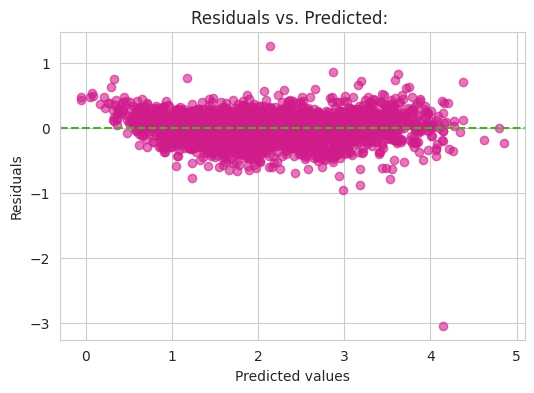

In [ ]:
plot_residuals_vs_predicted(ols, X_train, y_train)

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', np.float64(0.8650757875315968)),
 ('p-value', np.float64(0.9997812334986036))]

# **Observation:**
1) We have one disobedient outlier observation on (-3,4)  doesn't want to join the rest of the residuals, that are crowding nicely, without any distinctive / directional pattern, along the 0 line.

2) P value > 0.05. We fail to reject the null hypothesys. Residuals are homoscedastic.  

**Linearity of variables**
Predictor variables should have a linear relation with the dependent variable (Linear regression, after all...)

I'll plot residuals and the fitted values on a plot and see if residuals make a pattern or anything else suspicious...

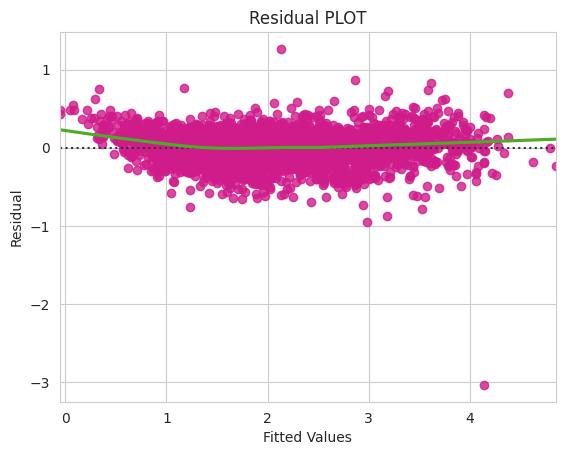

In [ ]:
# Predicted values
fitted = ols.fittedvalues

sns.residplot(x = fitted, y = ols.resid,  lowess = True, line_kws={'color': '#4dac26'})

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

Observation:

The LOESS line is almost completely smooth along the 0 line. A small tail on the left. This is fine. We can conclude that the linearity assumption is met.

**Normality**

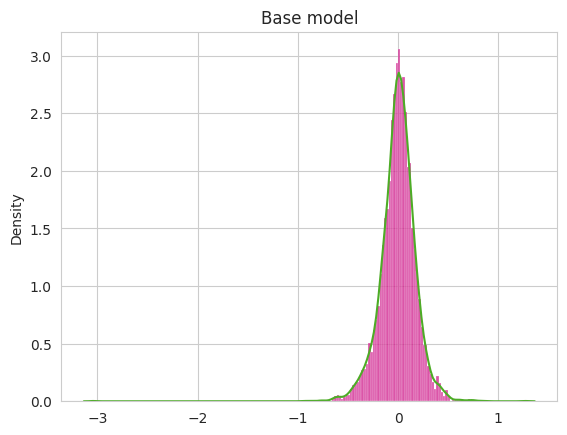

In [ ]:
# Plot histogram of base residuals
sns.histplot(ols.resid, color='#d01c8b', stat='density')  # Histogram
sns.kdeplot(ols.resid, color='#4dac26')  # KDE line
plt.title("Base model");


In [ ]:
from scipy.stats import shapiro

# Normality test
residuals = ols.resid

stat, p = shapiro(residuals)
print(f"Shapiro–Wilk Statistic: {stat:.4f}, p-value: {p:.4f}")

if p > 0.05:
    print("Fail to reject H0 - residuals are approximately normal")
else:
    print("Reject H0 - residuals deviate from normality")

Shapiro–Wilk Statistic: 0.9391, p-value: 0.0000
Reject H0 - residuals deviate from normality


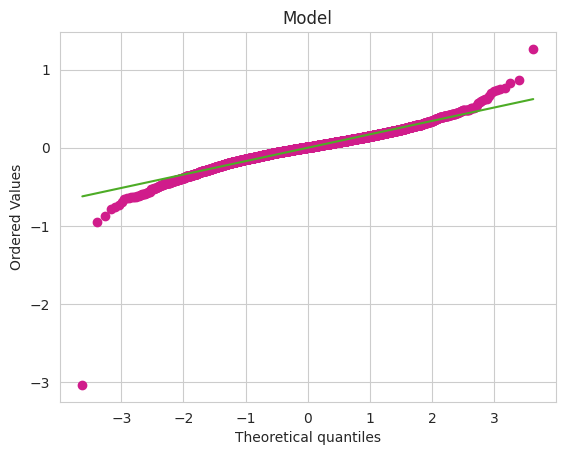

In [ ]:
# Q-Q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(ols.resid, dist = "norm", plot = pylab)
plt.gca().get_lines()[0].set_color('#d01c8b')  # dots
plt.gca().get_lines()[1].set_color('#4dac26')  # line
plt.title("Model")
plt.show()

**Observations:**

1) Visual check looks good. Symetric, bell shaped. A long tail in the left side, but overall pretty good.

2) Q-Q Plot looks fine. Most of the observations fit on the normality line, with some tails at the ends, but that's not alarming.

2) Shapiro Wilk test p > 0.05 - No strong evidence against normality

# **Cross Validation**

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()


cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')

print('Linear Model')

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

Linear Model
RSquared: 0.942 (+/- 0.025)
Mean Squared Error: 0.033 (+/- 0.014)


# **Observation:**

Using 10-fold cross-validation on the training data, the model shows only minor variability in performance, with R² fluctuating by approximately ±0.025 and MSE by ±0.014. The mean R² from cross-validation is only slightly lower than that of the original OLS model, indicating strong generalization and stability.

In [ ]:
X = X[X_train.columns]
X.columns

Index(['Engine', 'Power', 'Seats', 'KM_Driven_Per_Year', 'New_price_log',
       'Kilometers_Driven_log', 'Age', 'Mileage_NonLuxury_Interaction',
       'KM_Driven_Per_Year_Luxury_Interaction', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third', 'Make_Audi', 'Make_Bentley',
       'Make_Chevrolet', 'Make_Datsun', 'Make_Fiat', 'Make_Force One',
       'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Isuzu', 'Make_Jaguar',
       'Make_Jeep', 'Make_Lamborghini', 'Make_Mahindra', 'Make_Maruti',
       'Make_Mini', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Renault',
       'Make_Skoda', 'Make_Tata', 'Make_Toyota', 'Make_Volkswagen',
       'Make_Volvo', 'Class_Large', 'Class_Minivan', 'Class_Small SUV',
       'Class_Sport / Two Seater', 'Class_Standard SUV',
       'Clas

# **Final Linear Model - Not Regularized**

In [ ]:
def model_pref_sklearn(model, x_train, x_test, y_train, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_train, y_pred_train)),
                    np.sqrt(mean_squared_error(y_test, y_pred_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_train, y_pred_train),
                    mean_absolute_error(y_test, y_pred_test),
                ],
                "R²": [
                    r2_score(y_train, y_pred_train),
                    r2_score(y_test, y_pred_test),
                ],
            }
        )
    )

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit model
sklinearregression = LinearRegression()

sk_model = sklinearregression.fit(X_train, y_train)

print("Linear Model")
model_pref_sklearn(sk_model, X_train, X_test, y_train, y_test)

Linear Model
    Data      RMSE       MAE        R²
0  Train  0.177262  0.127383  0.944261
1   Test  0.179213  0.132113  0.940970


# **Regularization**


In [ ]:
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Parameter grids
alphas = np.logspace(-3, 2, 50)
l1_ratios = np.linspace(0.1, 0.9, 9)

# Models
ridge_model   = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, cv=10))
elastic_model = make_pipeline(StandardScaler(), ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, max_iter=10000))
lasso_model   = make_pipeline(StandardScaler(), LassoCV(alphas=alphas, cv=10, max_iter=10000, random_state=1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit
ridge_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict
preds = {
    "Ridge":      (ridge_model.predict(X_train),   ridge_model.predict(X_test)),
    "ElasticNet": (elastic_model.predict(X_train), elastic_model.predict(X_test)),
    "Lasso":      (lasso_model.predict(X_train),   lasso_model.predict(X_test)),
}

# Metrics
for name, (y_tr_pred, y_te_pred) in preds.items():
    r2_tr  = r2_score(y_train, y_tr_pred)
    r2_te  = r2_score(y_test,  y_te_pred)
    rmse_tr = np.sqrt(mean_squared_error(y_train, y_tr_pred))
    rmse_te = np.sqrt(mean_squared_error(y_test,  y_te_pred))
    print(f"=== {name} ===")
    print(f"Train R²: {r2_tr:.3f}, RMSE: {rmse_tr:.3f}")
    print(f"Test  R²: {r2_te:.3f}, RMSE: {rmse_te:.3f}\n")

=== Ridge ===
Train R²: 0.944, RMSE: 0.177
Test  R²: 0.941, RMSE: 0.179

=== ElasticNet ===
Train R²: 0.944, RMSE: 0.177
Test  R²: 0.941, RMSE: 0.179

=== Lasso ===
Train R²: 0.944, RMSE: 0.178
Test  R²: 0.941, RMSE: 0.179



In [ ]:
ridge_alpha = ridge_model.named_steps['ridgecv'].alpha_
elastic_alpha = elastic_model.named_steps['elasticnetcv'].alpha_
lasso_alpha = lasso_model.named_steps['lassocv'].alpha_

print(ridge_alpha, elastic_alpha, lasso_alpha)

2.9470517025518097 0.001 0.001


# **Extracting coefficients for best regularized model - Lasso**

In [ ]:
import pandas as pd

# fitted steps
scaler = lasso_model.named_steps['standardscaler']
lasso  = lasso_model.named_steps['lassocv']

# 2) coefficients on the scaled X
coef_scaled = pd.Series(lasso.coef_, index=X.columns, name='coef_scaled')
intercept_scaled = lasso.intercept_

# 3) non-zero coefficients sorted by magnitude
nz = (coef_scaled != 0)
coef_nonzero = coef_scaled[nz].sort_values(key=lambda s: s.abs(), ascending=False)

print("Alpha selected by CV:", lasso.alpha_)
print("Intercept (scaled space):", intercept_scaled)
print("\nTop non-zero coefficients (scaled space):")
print(coef_nonzero.head(30))

Alpha selected by CV: 0.001
Intercept (scaled space): 2.018022496079234

Top non-zero coefficients (scaled space):
Age                             -0.311443
New_price_log                    0.260343
Power                            0.158872
Mileage_NonLuxury_Interaction   -0.103648
Make_Tata                       -0.068391
Fuel_Type_Diesel                 0.049893
Class_Standard SUV               0.046487
Location_Kolkata                -0.044393
Fuel_Type_Petrol                -0.041478
Make_Chevrolet                  -0.040808
Location_Hyderabad               0.039604
Kilometers_Driven_log           -0.038729
Make_Mahindra                   -0.037071
Transmission_Manual             -0.036890
Location_Coimbatore              0.035931
Make_Hyundai                    -0.033940
Location_Bangalore               0.032267
Make_Ford                       -0.030758
Make_Volkswagen                 -0.026936
Class_Small SUV                  0.026655
Make_Renault                    -0.025788
Mak

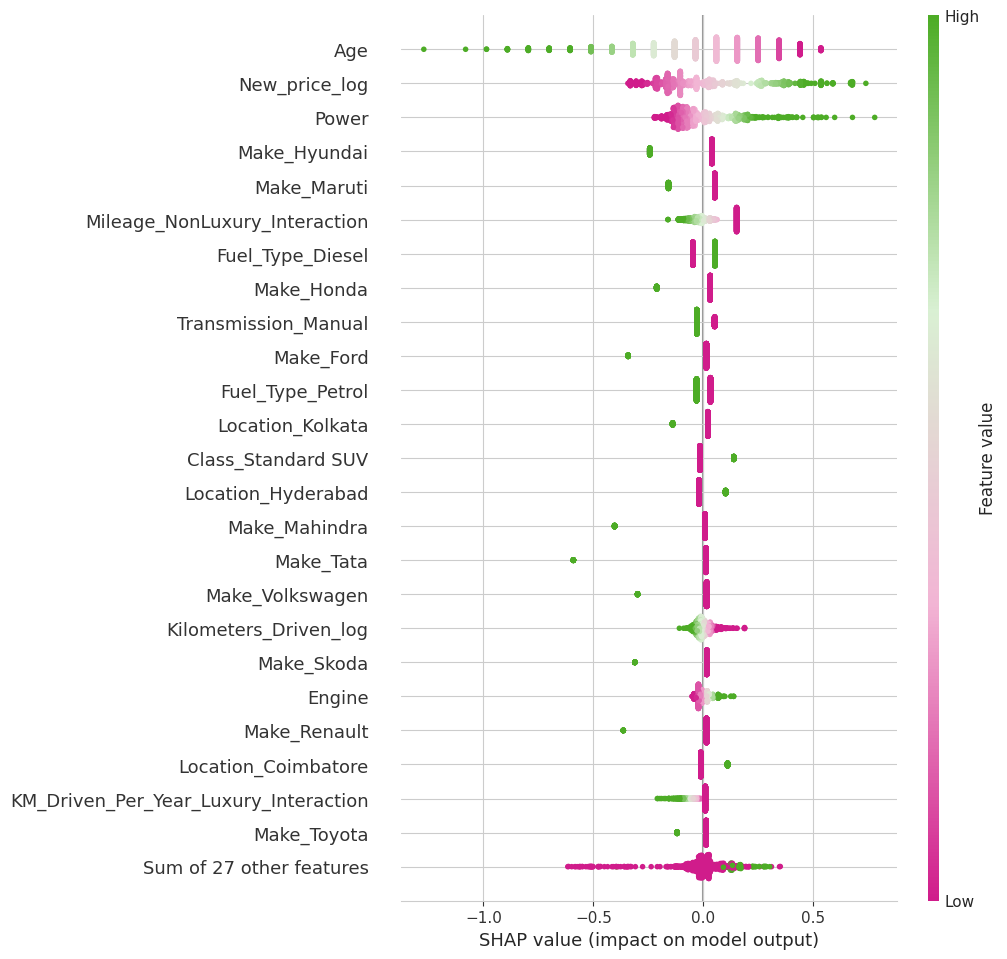

In [ ]:
import shap
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(
    'bubblegum_pistachio', ['#d01c8b', '#f2b4d4', '#d9f0d3', '#4dac26']
)

explainer = shap.Explainer(sk_model, X_train)
sv = explainer(X_test)

shap.plots.beeswarm(sv, max_display=25, color=cmap)

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
dt_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
param_dist = {
    "max_depth": [5, 10, 15, 20, 25, 30],
    "max_features": [15, 20, 25, 30, None],
    "min_samples_split": [10, 15, 20, 25, 30],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}


# Scoring metric
scorer = metrics.make_scorer(metrics.r2_score)

# Randomized search
randomized_cv = RandomizedSearchCV(
    dt_tuned,
    param_dist,
    scoring=scorer,
    n_iter=90,
    n_jobs=-1,
    cv=5,
    random_state=1
)

randomized_cv.fit(X_train, y_train)

# Best model
best_dt = randomized_cv.best_estimator_

# Print best parameters and CV score
print("Best parameters:", randomized_cv.best_params_)
print("CV R²:", randomized_cv.best_score_)

# Predict on train and test
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Compute R² and RMSE for train and test
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n=== Decision Tree Performance ===")
print(f"Train R²: {train_r2:.3f}, RMSE: {train_rmse:.3f}")
print(f"Test  R²: {test_r2:.3f}, RMSE: {test_rmse:.3f}")

Best parameters: {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
CV R²: 0.9235558147331748

=== Decision Tree Performance ===
Train R²: 0.966, RMSE: 0.139
Test  R²: 0.930, RMSE: 0.195


# **Observation:**

Our tree is slightly overfitting, but generalization is good.
In the base model, without the engineered features Is_Petrol_Low_KM and Mileage_NonLuxury_Interaction, the final model achieved

Train R²: 0.966, RMSE: 0.139

Test  R²: 0.930, RMSE: 0.195

Now the tree closed the R² gap with the linear models. RMSE is down, and overfitting is also down.


**Feature Importance**

### **Hyperparameter Tuning: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=90210, n_jobs=-1)

param_dist = {
    "n_estimators": [330, 340, 350, 360],
    "max_depth": [20, 25, 30, None],
    "max_features": [18, 19, 21, 22],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3]
}


scorer = metrics.make_scorer(metrics.r2_score)

search = RandomizedSearchCV(rf, param_dist, n_iter=60, cv=5, n_jobs=-1,
                            random_state=1, scoring=scorer)
search.fit(X_train, y_train)

best_rf = search.best_estimator_

print("Best params:", search.best_params_)
print("CV R²:", search.best_score_)

# Predict on train and test
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Compute R² and RMSE for train and test
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n=== Decision Tree Performance ===")
print(f"Train R²: {train_r2:.3f}, RMSE: {train_rmse:.3f}")
print(f"Test  R²: {test_r2:.3f}, RMSE: {test_rmse:.3f}")

Best params: {'n_estimators': 340, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 21, 'max_depth': 20}
CV R²: 0.9528998075120526

=== Decision Tree Performance ===
Train R²: 0.992, RMSE: 0.067
Test  R²: 0.961, RMSE: 0.146


**Feature Importance**

100%|===================| 1200/1204 [05:04<00:01]       

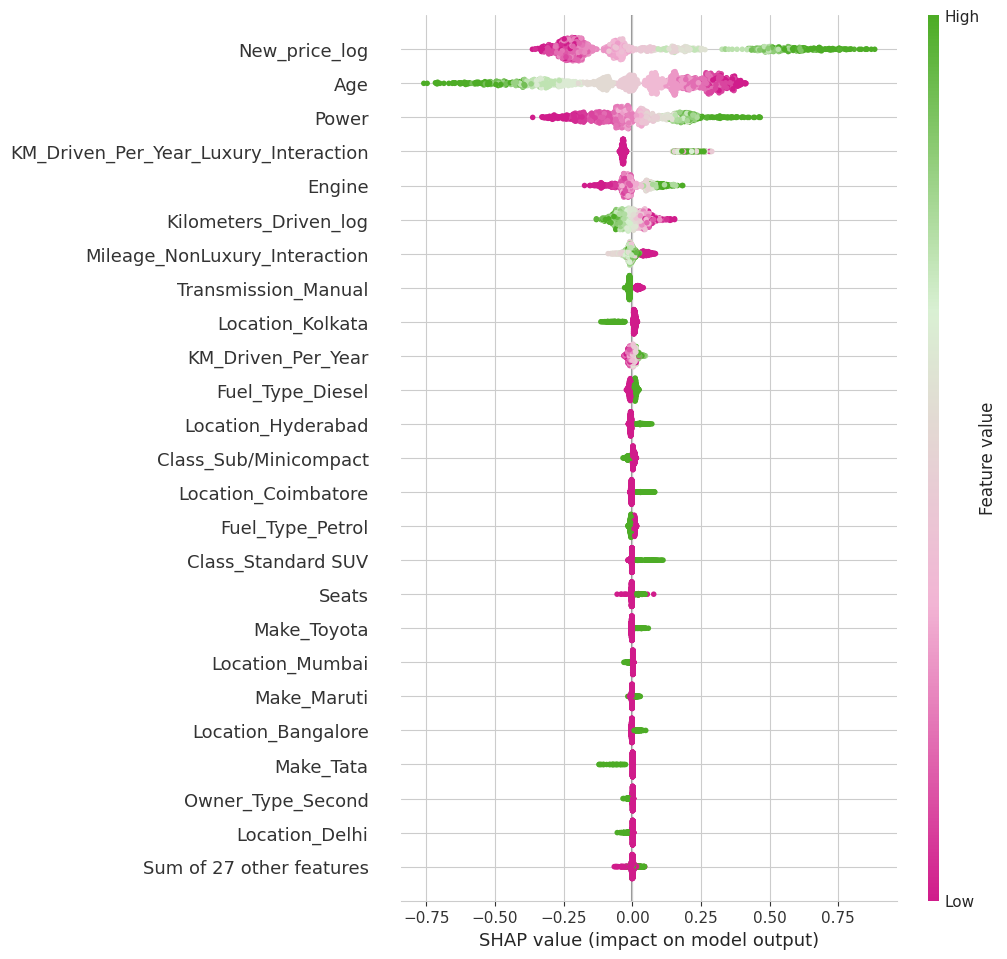

In [ ]:
import shap
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(
    'bubblegum_pistachio', ['#d01c8b', '#f2b4d4', '#d9f0d3', '#4dac26']
)

explainer = shap.Explainer(best_rf, X_train)
sv = explainer(X_test)

shap.plots.beeswarm(sv, max_display=25, color=cmap)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
 Hard-Tuned XGBoost
Train R²: 0.98609, RMSE: 0.08834
Test  R²: 0.97091, RMSE: 0.12686

Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 0.025, 'reg_alpha': 0.0, 'n_estimators': 1400, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 0.5}


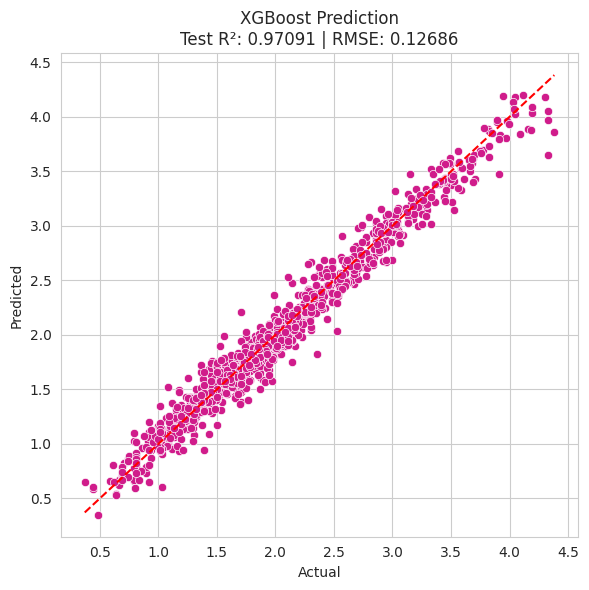

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90210)

# Enhanced param grid
param_dist = {
    "n_estimators":       range(1200, 1501, 100),
    "learning_rate":      [0.005, 0.01, 0.02],
    "max_depth":          range(5, 9, 1),
    "min_child_weight":   range(3, 8, 1),
    "subsample":          [0.3, 0.4, 0.5, 0.6],
    "colsample_bytree":   [0.4, 0.5, 0.6],
    "gamma":              [0.0, 0.02, 0.03],
    "reg_alpha":          [0.0, 0.001],
    "reg_lambda":         [0.01, 0.025],

}


# Base model
base_model = XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=10,
    eval_metric='rmse',
    random_state=1,
    verbosity=0
)

# Search
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=1
)

# Fit with early stopping on held-out set
random_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Best model
best_model = random_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output
print(" Hard-Tuned XGBoost")
print(f"Train R²: {train_r2:.5f}, RMSE: {train_rmse:.5f}")
print(f"Test  R²: {test_r2:.5f}, RMSE: {test_rmse:.5f}")
print("\nBest Hyperparameters:", random_search.best_params_)

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"XGBoost Prediction\nTest R²: {test_r2:.5f} | RMSE: {test_rmse:.5f}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
xgb_pred = best_model.predict(X_test)

# Blend
final_pred = 0.7 * xgb_pred + 0.3 * ridge_pred
final_r2 = r2_score(y_test, final_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"Blended R²: {final_r2:.3f}, RMSE: {final_rmse:.3f}")

Blended R²: 0.968, RMSE: 0.132


In [ ]:
# Search best weight
best_score = 0
best_w = 0

for w in np.linspace(0, 1, 101):
    blend_pred = w * xgb_pred + (1 - w) * ridge_pred
    score = r2_score(y_test, blend_pred)
    if score > best_score:
        best_score = score
        best_w = w

print(f"Best blend: {best_w:.2f} XGBoost, {1-best_w:.2f} Ridge → R² = {best_score:.4f}")

Best blend: 1.00 XGBoost, 0.00 Ridge → R² = 0.9709
